In [45]:
from earl_nema import NemaRC
from nema_plots import NemaPlots
from recon_compare import reconComp

import pydicom
from pydicom.tag import Tag
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
recon_dir = '/Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/'
its_list = os.listdir(recon_dir)
its_dirs = []

its = Tag(0x00910b2) #gives the number of iterations used in the recon

for i in its_list:
    its_dirs.append(os.path.join(recon_dir,i))


its_cov = [] #fill with COV extracted from NemaRC class instance
iterations = [] #fill with extracted number of iterations from DICOM headers
RC = [] #list of NemaRC class instances
for j in its_dirs:
    image_list = os.listdir(j)
    image_path = os.path.join(j,image_list[0])
    image = pydicom.dcmread(image_path)
    iterations.append(image[its].value)
    RC.append(NemaRC(j,20,2.0,0))
    #its_cov.append(a.COV)

#Function to pick out a particular iteration, it, from list of NemaRC objects
def RC_iter(it):
    i = iterations.index(it)
    return RC[i]

Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/28_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/13_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/7_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using th

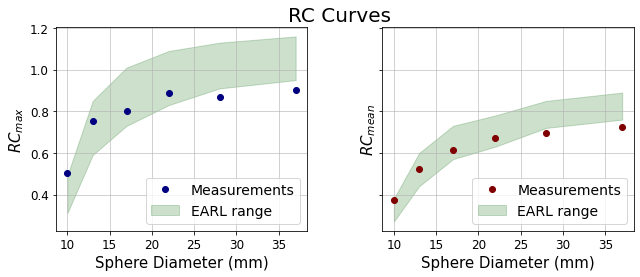

0.07217343599216673


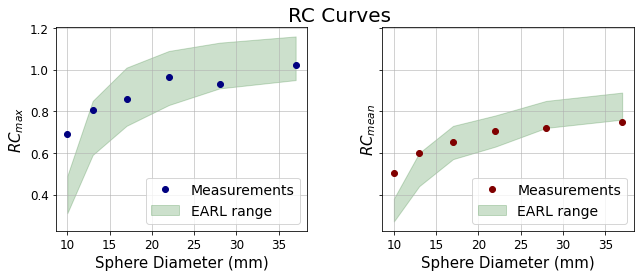

0.21796262280890036


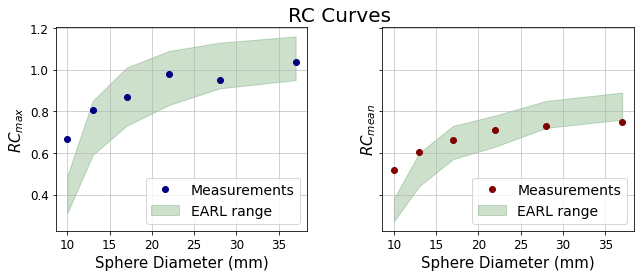

0.3354150160671822


In [47]:
a = RC_iter(2)
b = RC_iter(10)
c = RC_iter(30)

a.plot_RCs()
print(a.COV)
b.plot_RCs()
print(b.COV)
c.plot_RCs()
print(c.COV)

In [1]:
iters = range(1,31)
its_cov = []
cov_error = []
for i in iters:
    a = RC_iter(i)
    its_cov.append(a.COV)
    #cov_error.append(a.COV_error)


#plt.errorbar(iterations,its_cov,yerr=cov_error,marker='o',linestyle='')
plt.plot(iterations,its_cov,marker='o',linestyle='')
plt.xlabel('Number of Iterations')
plt.ylabel('COV')
plt.show()


NameError: name 'RC_iter' is not defined

In [145]:
#Check CoV for all t0 scans, TOF PSF 2i_34s with no filter

duration = [38,75,2.5*60,4.5*60,7.6*60,10*60]

recon_list = ['/Users/alexanderhart/t0/38s/fx_2i_34s/',
            '/Users/alexanderhart/t0/75s/fx_2i_34s/',
            '/Users/alexanderhart/t0/2p5m/fx_2i_34s/',
            '/Users/alexanderhart/t0/4p5m/fx_2i_34s/',
            '/Users/alexanderhart/t0/7p5m/fx_2i_34s/',
            '/Users/alexanderhart/t0/10m/fx_2i_34s/']

t0_cov = []
cov_error = []
for recon in recon_list:
    a = NemaRC(recon,20,2.0,0)
    t0_cov.append(a.COV)
    cov_error.append(a.COV_error)

Reading dicom directory: /Users/alexanderhart/t0/38s/fx_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/75s/fx_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/2p5m/fx_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexand

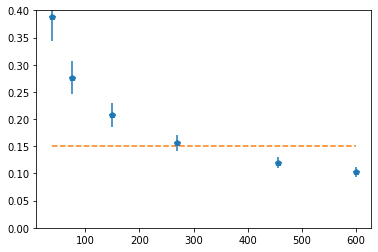

[0.38745875587906425, 0.2763129490127889, 0.2074364448850924, 0.15541403509693916, 0.11950202440853655, 0.10232090257846395]


In [155]:
threshold = [0.15,0.15,0.15,0.15,0.15,0.15]
plt.errorbar(duration,t0_cov,yerr=cov_error,marker='p',linestyle='')
plt.plot(duration,threshold,linestyle = 'dashed')
plt.ylim(0,0.4)
plt.show()
print(t0_cov)
cov_2i_nofilter = t0_cov
cov_2i_nofilter.reverse()

In [127]:
#true concentrations
sphere_true = 19.69
bkg_true = 2.11
#Analysis
hd_2i_34s = NemaRC('/Users/alexanderhart/t0/10m/hd_2i_34s/',sphere_true,bkg_true,0)
fx_2i_34s = NemaRC('/Users/alexanderhart/t0/10m/fx_2i_34s/',sphere_true,bkg_true,0)
fx_2i_34s_6p4 = NemaRC('/Users/alexanderhart/t0/10m/6p4_fx_2i_34s/',sphere_true,bkg_true,0)
fx_2i_16s_4 = NemaRC('/Users/alexanderhart/t0/10m/fx_2i_16s_4/',sphere_true,bkg_true,0)
fx_3i_16s = NemaRC('/Users/alexanderhart/t0/10m/fx_3i_16s/',sphere_true,bkg_true,0)
fx_3i_16s_4 = NemaRC('/Users/alexanderhart/t0/10m/fx_3i_16s_4/',sphere_true,bkg_true,0)
fx_3i_16s_6p4 = NemaRC('/Users/alexanderhart/t0/10m/6p4_fx_3i_16s/',sphere_true,bkg_true,0)
QFX350 = NemaRC('/Users/alexanderhart/GSC_/recondata/ActivityGuide2/t0_Q.Clear/QFX350',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/t0/10m/hd_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/fx_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/6p4_fx_2i_34s/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alex

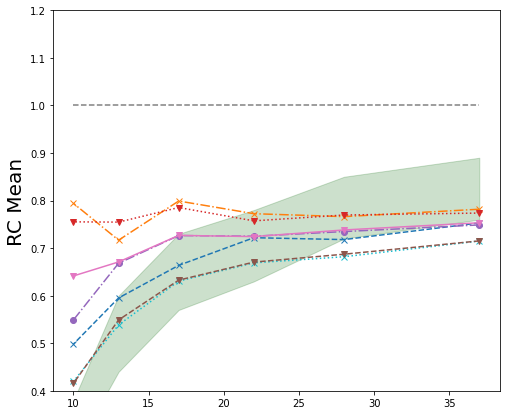

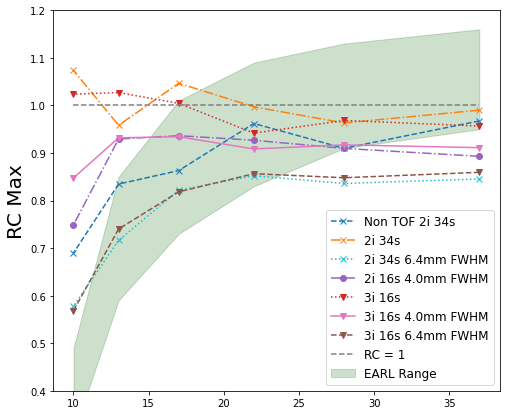

In [178]:
# EARL ranges
RC_max_lims = np.array([[0.95,1.16],[0.91,1.13],[0.83,1.09],
                                [0.73,1.01],[0.59,0.85],[0.31,0.49]])
RC_mean_lims = np.array([[0.76,0.89],[0.72,0.85],[0.63,0.78],
                                [0.57,0.73],[0.44,0.60],[0.27,0.38]])

x = [10,37]
y = [1,1]

# Plots
spheres = np.array([37, 28, 22, 17, 13, 10])
plt.figure(figsize=(8,7))
plt.plot(spheres,hd_2i_34s.spheres['RC_mean'],marker='x', linestyle = '--')
plt.plot(spheres,fx_2i_34s.spheres['RC_mean'],marker = 'x',linestyle = 'dashdot')
plt.plot(spheres,fx_2i_34s_6p4.spheres['RC_mean'],marker = 'x', linestyle = 'dotted',color='C9')
plt.plot(spheres,fx_2i_16s_4.spheres['RC_mean'],marker = 'o', linestyle = 'dashdot',color='C4')
plt.plot(spheres,fx_3i_16s.spheres['RC_mean'],marker = 'v',linestyle = 'dotted',color='C3')
plt.plot(spheres,fx_3i_16s_4.spheres['RC_mean'],marker = 'v',linestyle = 'solid',color='C6')
plt.plot(spheres,fx_3i_16s_6p4.spheres['RC_mean'],marker = 'v',linestyle = 'dashed',color='C5')
#plt.plot(spheres,QFX350.spheres['RC_mean'],marker = 'p',linestyle = 'dotted')
plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL range')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
#plt.legend(['Non TOF 2i 34s','2i 34s','2i 34s 6.4mm FWHM','3i 16s','3i 16s 6.4mm FWHM','Q.Clear 350'])
plt.show()

plt.figure(figsize=(8,7))
plt.plot(spheres,hd_2i_34s.spheres['RC_max'],marker='x', linestyle = '--',label = 'Non TOF 2i 34s')
plt.plot(spheres,fx_2i_34s.spheres['RC_max'],marker = 'x',linestyle = 'dashdot',label = '2i 34s')
plt.plot(spheres,fx_2i_34s_6p4.spheres['RC_max'],marker = 'x', linestyle = 'dotted',color='C9',label = '2i 34s 6.4mm FWHM')
plt.plot(spheres,fx_2i_16s_4.spheres['RC_max'],marker = 'o', linestyle = 'dashdot',color='C4',label = '2i 16s 4.0mm FWHM')
plt.plot(spheres,fx_3i_16s.spheres['RC_max'],marker = 'v',linestyle = 'dotted',color='C3',label = '3i 16s')
plt.plot(spheres,fx_3i_16s_4.spheres['RC_max'],marker = 'v',linestyle = 'solid',color = 'C6',label = '3i 16s 4.0mm FWHM')
plt.plot(spheres,fx_3i_16s_6p4.spheres['RC_max'],marker = 'v',linestyle = 'dashed',color='C5',label = '3i 16s 6.4mm FWHM')
#plt.plot(spheres,QFX350.spheres['RC_max'],marker = 'p',linestyle = 'dotted')
plt.fill_between(spheres, RC_max_lims[:,0], RC_max_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL Range')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray',label = 'RC = 1')
plt.ylabel('RC Max', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
#plt.legend(['Non TOF 2i 34s','2i 34s','2i 34s 6.4mm FWHM','2i 16s 4.0mm FWHM','3i 16s','3i 16s 4.0mm FWHM','3i 16s 6.4mm FWHM','EARL Range','RC = 1'],fontsize = 12)
plt.show()

In [36]:
hd_2i_34s.spheres['RC_mean'][0]

0.7398150771605454

In [110]:
print(fx_3i_16s.COV)
print(fx_3i_16s_4.COV)
print(fx_3i_16s_6p4.COV)
print(fx_2i_34s.COV)
print(fx_2i_34s_6p4.COV)
print(QFX350.COV)

0.08015375339757697
0.06338885752936507
0.04097943883204142
0.10232090257846395
0.04730002411324447
0.05749474474593616


Reading dicom directory: /Users/alexanderhart/t0/10m/fx_2i_16s_4/
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


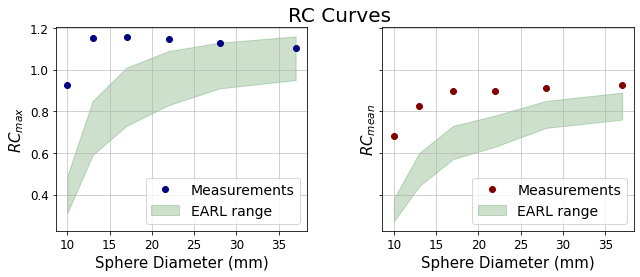

0.8569780731663156
0.12079924104445522


In [7]:
new_sphere_true = 15.9
bkg_true = 2.11
a = NemaRC('/Users/alexanderhart/t0/10m/fx_2i_16s_4/',new_sphere_true,bkg_true,0)
a.plot_RCs()
print(a.MCR_mean)
print(a.mean_curv)

In [188]:
a.spheres

,"""Blob"" Radius (mm)",Z_loc (pixels),Y_loc (pixels),X_loc (pixels),S_max (kBq/mL),S_mean (kBq/mL),RC_max,RC_max EARL Compatible,RC_mean,RC_mean EARL Compatible
0,14.388889,37.0,100.0,110.0,18.195887,14.820984,0.924118,False,0.752716,False
1,14.388889,37.0,114.0,102.0,19.031685,14.787897,0.966566,True,0.751036,True
2,14.388889,37.0,114.0,87.0,18.602950,14.469459,0.944792,True,0.734863,True
3,11.025000,36.0,101.0,79.0,18.552386,14.008245,0.942224,True,0.711440,True
4,7.661111,36.0,87.0,87.0,17.628150,12.737245,0.895284,False,0.646889,False
5,7.661111,36.0,87.0,102.0,14.551030,10.747238,0.739006,False,0.545822,False


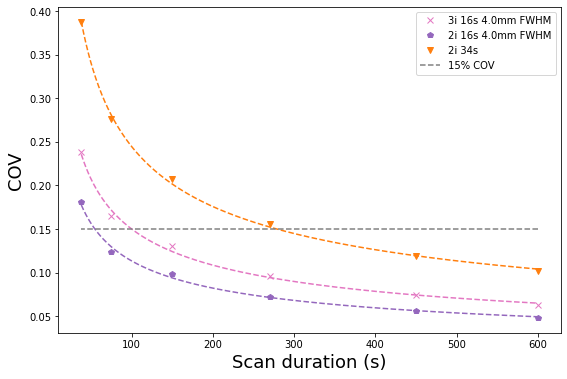

In [170]:
#COV plots
time = [600,450,270,150,75,38]
fit_time = np.linspace(38,600,600)

#with 16 subsets and 4mm FWHM each
cov_3i = [.063,.074,.096,0.130,0.165,0.2387]
cov_2i = [0.048,0.056,0.072,0.099,0.124,0.1805]

fit_3i = 1.289*fit_time**(-0.467)
fit_2i = 0.961*fit_time**(-0.464)
fit_2i_no_filter = 2.2004*fit_time**(-0.477)

threshold = [0.15,0.15,0.15,0.15,0.15,0.15]

plt.figure(figsize=(9,6))
plt.plot(time,cov_3i,marker='x',linestyle='',color='C6',label='3i 16s 4.0mm FWHM')
plt.plot(fit_time,fit_3i,marker='',linestyle='--',color='C6')
plt.plot(time,cov_2i,marker='p',linestyle='',color='C4',label='2i 16s 4.0mm FWHM')
plt.plot(fit_time,fit_2i,marker='',linestyle='--',color='C4')
plt.plot(time,cov_2i_nofilter,marker='v',linestyle='',color='C1',label='2i 34s')
plt.plot(fit_time,fit_2i_no_filter,marker='',linestyle='--',color='C1')
plt.plot(time,threshold,marker = '',linestyle='--',color='gray',label='15% COV')
plt.xlabel('Scan duration (s)',fontsize=18)
plt.ylabel('COV',fontsize=18)
#plt.legend(['3i 16s 4.0mm FWHM','Power Fit','2i 16s 4.0mm FWHM','Power Fit','2i 34s','Power Fit','15% COV'],fontsize=14)
plt.legend()
plt.show()

In [155]:
#sphere_true = 15.9 #new sphere 'true' activity concentration taken from Horos analysis
sphere_true = 16.55 #calculated by assuming the largest sphere of the QFX 800 recon has a mean recovery of 0.9 (Kaalep)
bkg_true = 2.11
'''
a = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_34s_6p4',sphere_true,bkg_true,0,0.085)
a.plot_RCs()
print(a.COV)
a = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_16s',sphere_true,bkg_true,0,0.085)
a.plot_spheres()
a.plot_RCs()
print(a.COV)
a.spheres
a.plot_spheres()
'''

"\na = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_34s_6p4',sphere_true,bkg_true,0,0.085)\na.plot_RCs()\nprint(a.COV)\na = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_16s',sphere_true,bkg_true,0,0.085)\na.plot_spheres()\na.plot_RCs()\nprint(a.COV)\na.spheres\na.plot_spheres()\n"

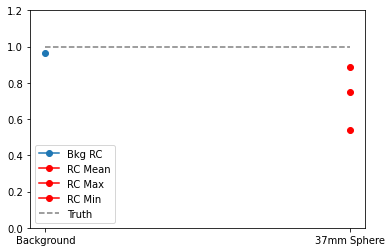

In [206]:
bkg_rc = 2.04/bkg_true
bkg_noise = 127.7/bkg_true
sphere_noise = 1317/sphere_true
truth_x = ['Background','37mm Sphere']
truth_y = [1,1]

rc_min = 10.643/sphere_true
rc_max = 17.489/sphere_true

plt.plot('Background',bkg_rc,marker='o',label = 'Bkg RC')
plt.plot('37mm Sphere',0.75,marker = 'o',label='RC Mean',color = 'red')
plt.plot('37mm Sphere',rc_max,marker = 'o',label='RC Max',color = 'red')
plt.plot('37mm Sphere',rc_min,marker = 'o',label='RC Min',color = 'red')
plt.plot(truth_x,truth_y,label = 'Truth',linestyle = '--',color='gray')
plt.ylim(0,1.2)
plt.legend()
plt.show()

Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_34s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


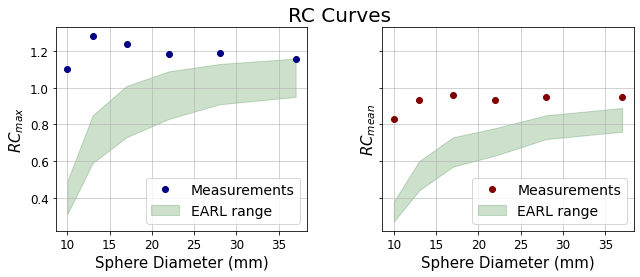

0.059387109606304445


In [3]:
sphere_true = 15.9 #new sphere 'true' activity concentration taken from Horos analysis
bkg_true = 2.11

#FXS all subsets, 2i
#FXS_2i_4s = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_4s',sphere_true,bkg_true,0,0.085)
FXS_2i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_8s',sphere_true,bkg_true,0,0.085)
FXS_2i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_2i_34s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_34s',sphere_true,bkg_true,0)


FXS_2i_16s.plot_RCs()
print(FXS_2i_16s.COV)

Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_1i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_3i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


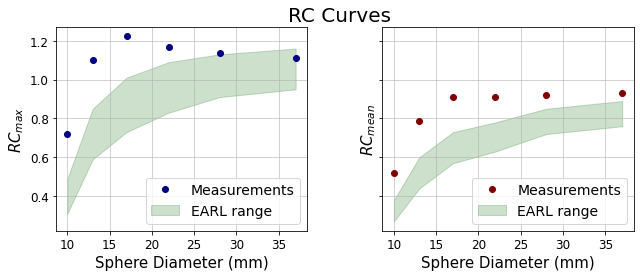

In [78]:
#FXS all i, 16 subsets
FXS_1i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_1i_16s',sphere_true,bkg_true,0,0.085)
FXS_2i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_3i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_16s',sphere_true,bkg_true,0)

FXS_1i_16s.plot_RCs()

In [60]:
#FXS Constant Iterative Updates

#16
FXS_1i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_1i_16s',sphere_true,bkg_true,0,0.085)
FXS_2i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_8s',sphere_true,bkg_true,0,0.085)
FXS_4i_4s = NemaRC('/Users/alexanderhart/t0/10m/FXS_4i_4s',sphere_true,bkg_true,0,0.085)

#24
FXS_6i_4s = NemaRC('/Users/alexanderhart/t0/10m/FXS_6i_4s',sphere_true,bkg_true,0)
FXS_3i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_8s',sphere_true,bkg_true,0)

#32
FXS_2i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_4i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_4i_8s',sphere_true,bkg_true,0)
FXS_8i_4s = NemaRC('/Users/alexanderhart/t0/10m/FXS_8i_4s',sphere_true,bkg_true,0)

#48
FXS_3i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_16s',sphere_true,bkg_true,0)
FXS_6i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_6i_8s',sphere_true,bkg_true,0)
FXS_8i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_8i_8s',sphere_true,bkg_true,0)

#64
FXS_2i_34s = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_34s',sphere_true,bkg_true,0)
FXS_4i_16s = NemaRC('/Users/alexanderhart/t0/10m/FXS_4i_16s',sphere_true,bkg_true,0)
FXS_8i_8s = NemaRC('/Users/alexanderhart/t0/10m/FXS_8i_8s',sphere_true,bkg_true,0)


Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_1i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_4i_4s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderh

In [41]:
#Post Recon Gaussian Smoothing 2i 16s
FXS_2i_16s_3 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_3mm',sphere_true,bkg_true,0)
FXS_2i_16s_4 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_4mm',sphere_true,bkg_true,0)
FXS_2i_16s_5 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_5mm',sphere_true,bkg_true,0)
FXS_2i_16s_6p4 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_6p4mm',sphere_true,bkg_true,0)
FXS_2i_16s_7 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_7mm',sphere_true,bkg_true,0)
FXS_2i_16s_8 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_8mm',sphere_true,bkg_true,0)


Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s_3mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s_4mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s_5mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Us

In [57]:
#Post Recon Gaussian Smoothing 3i 8s
FXS_3i_8s_4 = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_8s_4mm',sphere_true,bkg_true,0)
FXS_3i_8s_5 = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_8s_5mm',sphere_true,bkg_true,0)
FXS_3i_8s_6p4 = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_8s_6p4mm',sphere_true,bkg_true,0)
#FXS_3i_8s_7 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_7mm',sphere_true,bkg_true,0)
FXS_3i_8s_8 = NemaRC('/Users/alexanderhart/t0/10m/FXS_3i_8s_8mm',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_3i_8s_4mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_3i_8s_5mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_3i_8s_6p4mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Use

Reading dicom directory: /Users/alexanderhart/t0/10m/HDS_2i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/HDS_2i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/HDS_2i_34s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


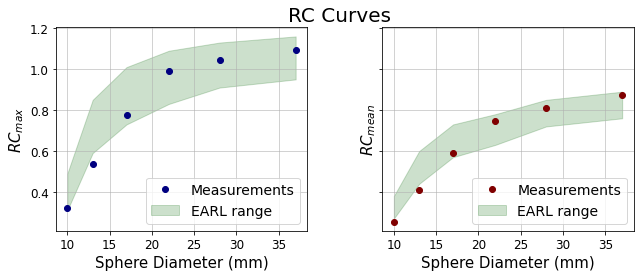

0.034592537687475916


In [68]:
#HDS
HDS_2i_8s = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_8s',sphere_true,bkg_true,0,0.085)
HDS_2i_16s = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_16s',sphere_true,bkg_true,0)
HDS_2i_34s = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_34s',sphere_true,bkg_true,0)


HDS_2i_8s.plot_RCs()
print(FXS_2i_8s.COV)

In [6]:
#QFX
QFX_150 = NemaRC('/Users/alexanderhart/t0/10m/QFX_150',sphere_true,bkg_true,0)
QFX_200 = NemaRC('/Users/alexanderhart/t0/10m/QFX_200',sphere_true,bkg_true,0)
QFX_250 = NemaRC('/Users/alexanderhart/t0/10m/QFX_250',sphere_true,bkg_true,0)
QFX_300 = NemaRC('/Users/alexanderhart/t0/10m/QFX_300',sphere_true,bkg_true,0)
QFX_350 = NemaRC('/Users/alexanderhart/t0/10m/QFX_350',sphere_true,bkg_true,0)
QFX_400 = NemaRC('/Users/alexanderhart/t0/10m/QFX_400',sphere_true,bkg_true,0)
QFX_500 = NemaRC('/Users/alexanderhart/t0/10m/QFX_500',sphere_true,bkg_true,0)
QFX_600 = NemaRC('/Users/alexanderhart/t0/10m/QFX_600',sphere_true,bkg_true,0)
QFX_700 = NemaRC('/Users/alexanderhart/t0/10m/QFX_700',sphere_true,bkg_true,0)
QFX_800 = NemaRC('/Users/alexanderhart/t0/10m/QFX_800',sphere_true,bkg_true,0)
QFX_1000 = NemaRC('/Users/alexanderhart/t0/10m/QFX_1000',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/t0/10m/QFX_150
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/QFX_200
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/QFX_250
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/

In [27]:
#Kelowna preliminary comparison
kelowna_sphere = 19.69
vic_sphere = 15.88
Vic_clinical = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_34s_6p4mm',vic_sphere,bkg_true,0)
Kelowna_clinical = NemaRC('/Users/alexanderhart/Kelowna/t0/10m/FXS_2i_34s_6p4mm',kelowna_sphere,bkg_true,0)



Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_34s_6p4mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/Kelowna/t0/10m/FXS_2i_34s_6p4mm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


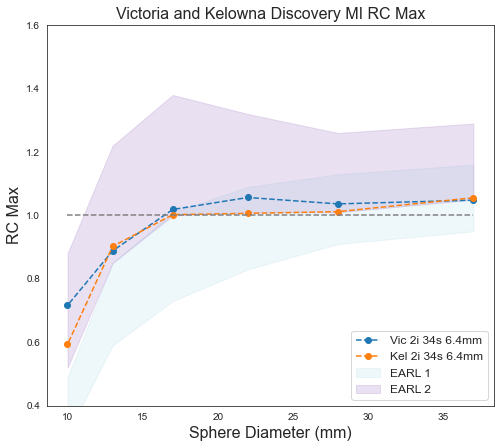

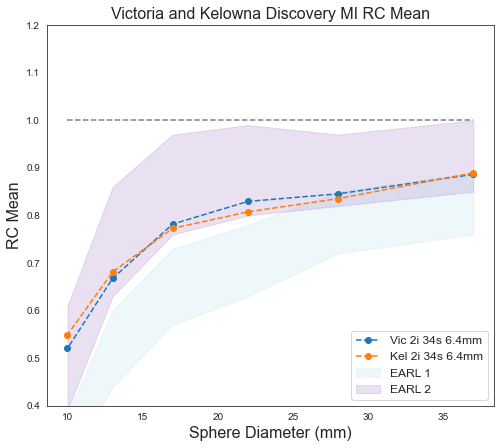

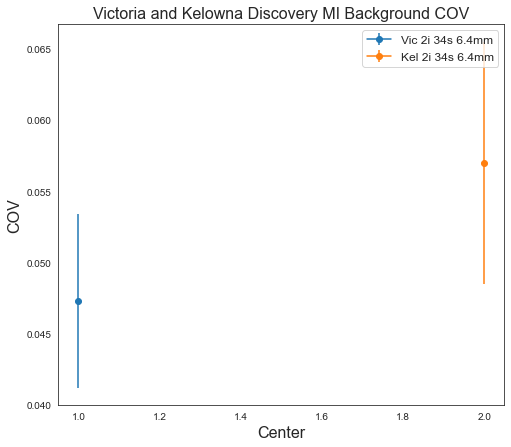

,"""Blob"" Radius (mm)",Z_loc (pixels),Y_loc (pixels),X_loc (pixels),S_max (kBq/mL),S_mean (kBq/mL),RC_max,RC_max EARL Compatible,RC_mean,RC_mean EARL Compatible
0,14.388889,37.0,100.0,110.0,16.646974,14.076481,1.048298,True,0.886428,True
1,14.388889,37.0,114.0,102.0,16.459062,13.425825,1.036465,True,0.845455,True
2,14.388889,37.0,114.0,87.0,16.780019,13.172826,1.056676,True,0.829523,False
3,11.025000,36.0,101.0,79.0,16.178619,12.416536,1.018805,False,0.781898,False
4,11.025000,37.0,87.0,87.0,14.103931,10.604266,0.888157,False,0.667775,False
5,7.661111,36.0,87.0,102.0,11.378404,8.267337,0.716524,False,0.520613,False


In [28]:
Kelowna = NemaPlots([Vic_clinical,Kelowna_clinical],['Vic 2i 34s 6.4mm','Kel 2i 34s 6.4mm'],'Victoria and Kelowna Discovery MI')
Kelowna.RCmax()
Kelowna.RCmean()
Kelowna.COV([1,2],'Center')
Vic_clinical.spheres
#Kelowna_clinical.spheres

QFX_800.plot_RCs()
QFX_200.plot_spheres()
QFX_200.plot_ROIs()
print(QFX_800.COV)

Reading dicom directory: /Users/alexanderhart/t0/10m/HDS_2i_34s_6p4
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


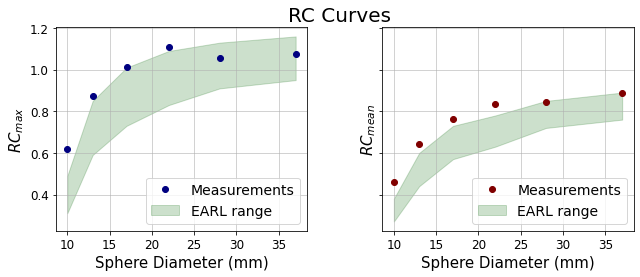

In [89]:
# Clinical Reconstruction
HDS_clinical = NemaRC('/Users/alexanderhart/t0/10m/HDS_2i_34s_6p4',sphere_true,bkg_true,0)
HDS_clinical.plot_RCs()

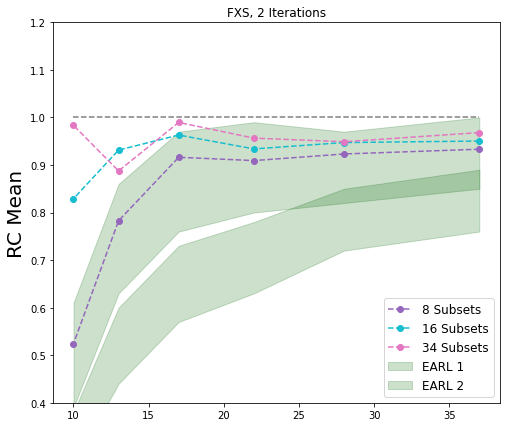

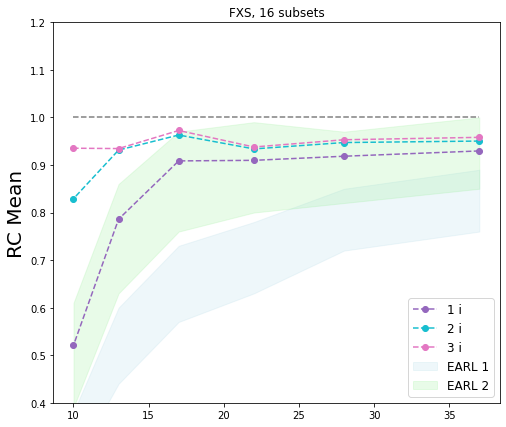

In [99]:
# EARL ranges

#EARL 1
RC_max_lims = np.array([[0.95,1.16],[0.91,1.13],[0.83,1.09],
                                [0.73,1.01],[0.59,0.85],[0.31,0.49]])
RC_mean_lims = np.array([[0.76,0.89],[0.72,0.85],[0.63,0.78],
                                [0.57,0.73],[0.44,0.60],[0.27,0.38]])

#EARL 2
RC_max_2 = np.array([[1.05,1.29],[1.01,1.26],[1.01,1.32],
                                [1.00,1.38],[0.85,1.22],[0.52,0.88]])
RC_mean_2 = np.array([[0.85,1.0],[0.82,0.97],[0.8,0.99],
                                [0.76,0.97],[0.63,0.86],[0.39,0.61]])
SUV_peak_2 = np.array([[0.99,1.07],[0.95,1.07],[0.9,1.09],[0.75,0.99],[0.45,0.69],[0.27,0.41]])

x = [10,37]
y = [1,1]

# FXS Plots all subsets, 2 iterations
plt.figure(figsize=(8,7))
plt.plot(spheres,FXS_2i_8s.spheres['RC_mean'],marker='o', linestyle = '--',color='C4',label='8 Subsets')
plt.plot(spheres,FXS_2i_16s.spheres['RC_mean'],marker = 'o',linestyle = '--',color='C9',label = '16 Subsets')
plt.plot(spheres,FXS_2i_34s.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C6',label='34 Subsets')

plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL 1')
plt.fill_between(spheres, RC_mean_2[:,0], RC_mean_2[:,1],
                         color='darkgreen', alpha=0.2, label='EARL 2')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
plt.title('FXS, 2 Iterations')
plt.show()


# All iterations, 16 subsets
plt.figure(figsize=(8,7))
plt.plot(spheres,FXS_1i_16s.spheres['RC_mean'],marker='o', linestyle = '--',color='C4',label='1 i')
plt.plot(spheres,FXS_2i_16s.spheres['RC_mean'],marker = 'o',linestyle = '--',color='C9',label = '2 i')
plt.plot(spheres,FXS_3i_16s.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C6',label='3 i')

plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='lighspheres = np.array([37, 28, 22, 17, 13, 10])
tblue', alpha=0.2, label='EARL 1')
plt.fill_between(spheres, RC_mean_2[:,0], RC_mean_2[:,1],
                         color='lightgreen', alpha=0.2, label='EARL 2')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
plt.title('FXS, 16 subsets')
plt.show()

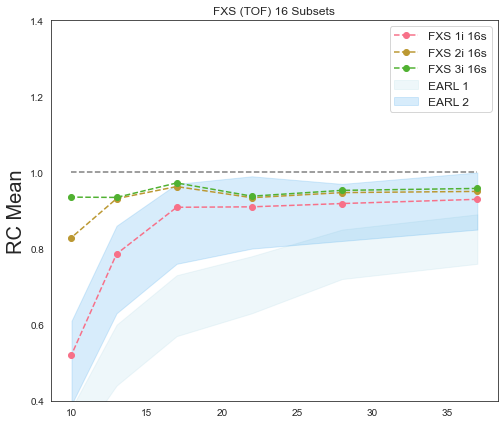

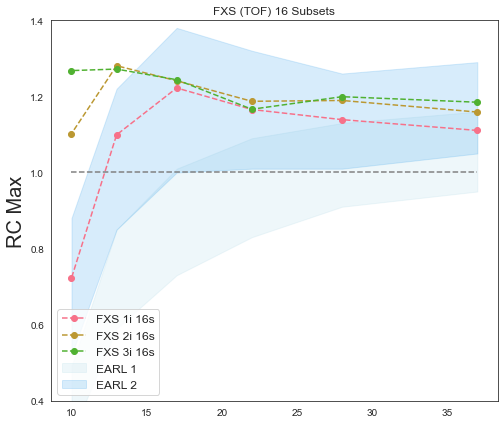

In [111]:
a = NemaPlots([FXS_1i_16s,FXS_2i_16s,FXS_3i_16s],['FXS 1i 16s','FXS 2i 16s','FXS 3i 16s'],'FXS (TOF) 16 Subsets')
a.RCmean()
a.RCmax()

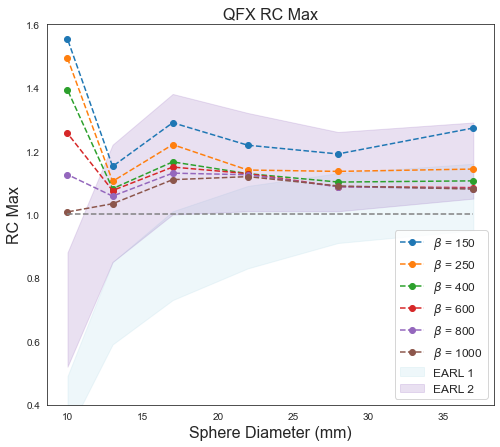

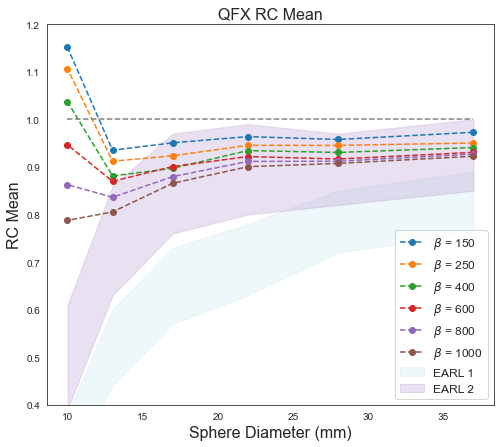

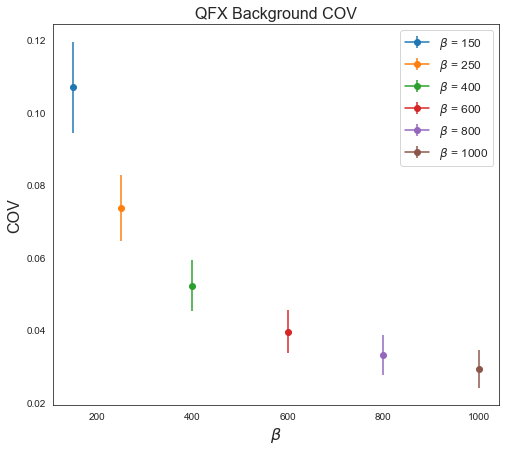

In [30]:
Qclear = NemaPlots([QFX_150,QFX_250,QFX_400,QFX_600,QFX_800,QFX_1000],[r'$\beta$ = 150',r'$\beta$ = 250',r'$\beta$ = 400',r'$\beta$ = 600',r'$\beta$ = 800',r'$\beta$ = 1000'],'QFX')
Qclear.RCmax()
Qclear.RCmean()
Qclear.COV([150,250,400,600,800,1000],r'$\beta$')

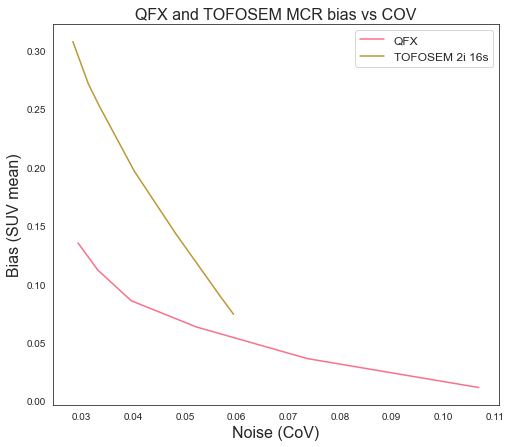

In [64]:
# Qclear.nvb_plot()
# fwhm.nvb_plot()
reconComp([Qclear,fwhm],['QFX','TOFOSEM 2i 16s'],'QFX and TOFOSEM').cov_mcr()

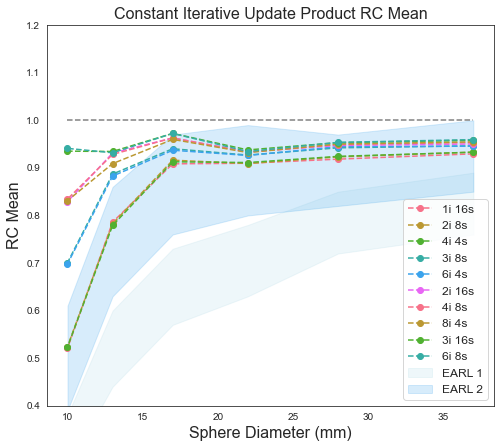

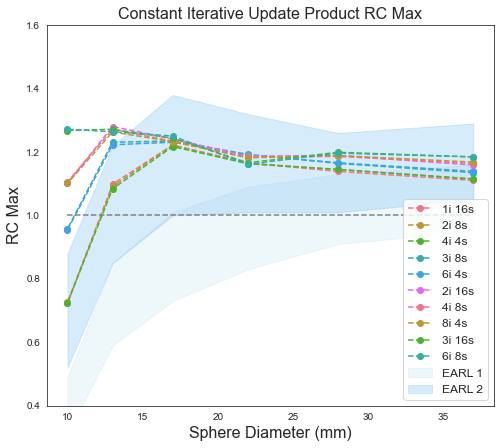

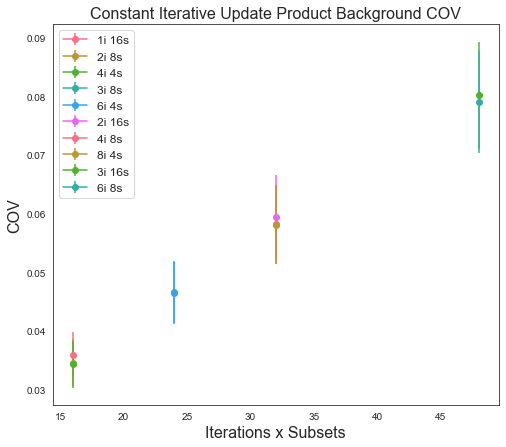

In [145]:
# Constant Iterative Updates
'''
IU16 = NemaPlots([FXS_1i_16s,FXS_2i_8s,FXS_4i_4s],['1i 16s','2i 8s','4i 4s'],'16 Iterative Updates')
IU16.RCmean()
print(FXS_1i_16s.COV)
print(FXS_2i_8s.COV)
print(FXS_4i_4s.COV)

IU32 = NemaPlots([FXS_2i_16s,FXS_4i_8s,FXS_8i_4s],['2i 16s','4i 8s','8i 4s'],'32 Iterative Updates')
IU32.RCmean()
print(FXS_2i_16s.COV)
print(FXS_4i_8s.COV)
print(FXS_8i_4s.COV)

IU48 = NemaPlots([FXS_3i_16s,FXS_6i_8s],['3i 16s','6i 8s'],'48 Iterative Updates')
IU48.RCmean()

print(FXS_3i_16s.COV)
print(FXS_6i_8s.COV)
'''
IUP = NemaPlots([FXS_1i_16s,FXS_2i_8s,FXS_4i_4s,FXS_3i_8s,FXS_6i_4s,FXS_2i_16s,FXS_4i_8s,FXS_8i_4s,FXS_3i_16s,FXS_6i_8s],['1i 16s','2i 8s','4i 4s','3i 8s','6i 4s','2i 16s','4i 8s','8i 4s','3i 16s','6i 8s'],'Constant Iterative Update Product')
IUP.RCmean()
IUP.RCmax()
IUP.COV([16,16,16,24,24,32,32,32,48,48],'Iterations x Subsets')

In [174]:
NemaRC('/Users/alexanderhart/t0/10m/QFX_1000',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/t0/10m/QFX_1000
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
Calculating coefficient of variation...
Procedure complete.


In [55]:
#Gaussian Filtering 2i 16s 

fwhm2i_16s = NemaPlots([FXS_2i_16s,FXS_2i_16s_3,FXS_2i_16s_4,FXS_2i_16s_5,FXS_2i_16s_6p4, FXS_2i_16s_7, FXS_2i_16s_8],['No Filter','3.0mm FWHM','4.0mm FWHM','5.0mm FWHM','6.4mm FWHM','7.0mm FWHM','8.0mm FWHM'],'Post Recon Smoothiing - 2i 16s')
# fwhm.RCmax()
# fwhm.RCmean()
# fwhm.COV([0,3,4,5,6.4,7,8],'Gaussian FWHM (mm)')

In [61]:
#Gaussian Filtering 3i 8s 
fwhm3i_8s = NemaPlots([FXS_3i_8s,FXS_3i_8s_4,FXS_3i_8s_5,FXS_3i_8s_6p4,FXS_3i_8s_8],['No Filter','4.0mm FWHM','5.0mm FWHM','6.4mm FWHM','8.0mm FWHM'],'Post Recon Smoothing - 3i 8s')
# fwhm.RCmax()
# fwhm.RCmean()
# fwhm.COV([0,4,5,6.4,8],'Gaussian FWHM (mm)')

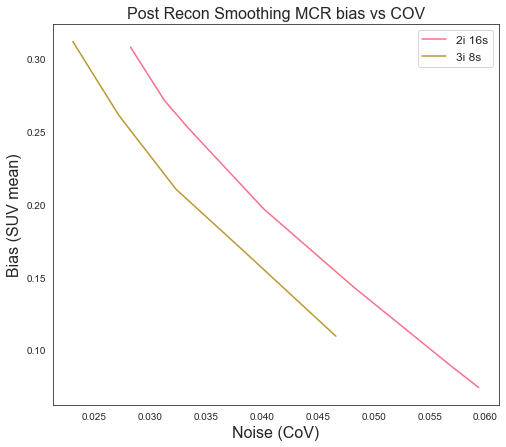

In [65]:
reconComp([fwhm2i_16s,fwhm3i_8s],['2i 16s','3i 8s'],'Post Recon Smoothing').cov_mcr()

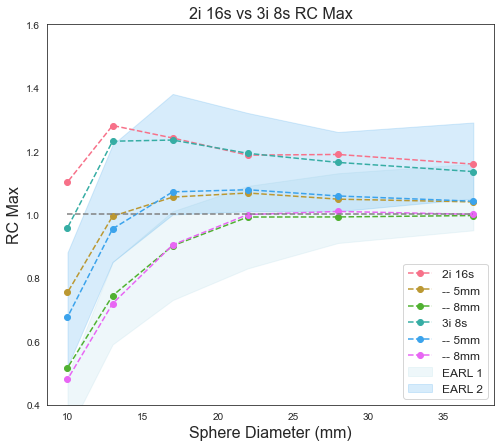

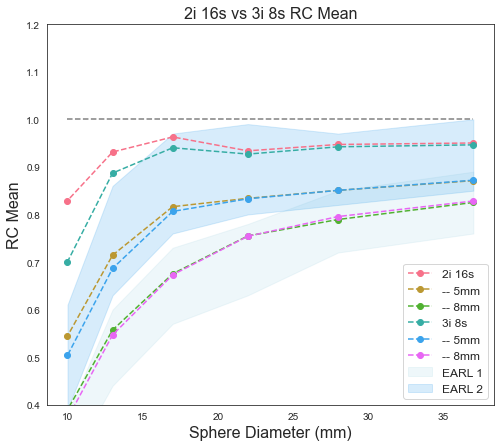

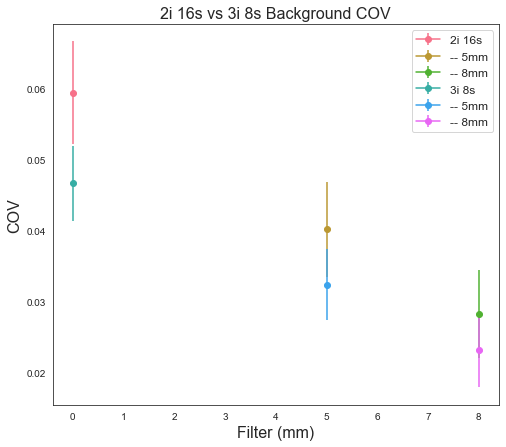

In [168]:
two_or_three = NemaPlots([FXS_2i_16s,FXS_2i_16s_5,FXS_2i_16s_8,FXS_3i_8s,FXS_3i_8s_5,FXS_3i_8s_8],['2i 16s','-- 5mm','-- 8mm','3i 8s','-- 5mm','-- 8mm'],'2i 16s vs 3i 8s')
two_or_three.RCmax()
two_or_three.RCmean()
two_or_three.COV([0,5,8,0,5,8],'Filter (mm)')

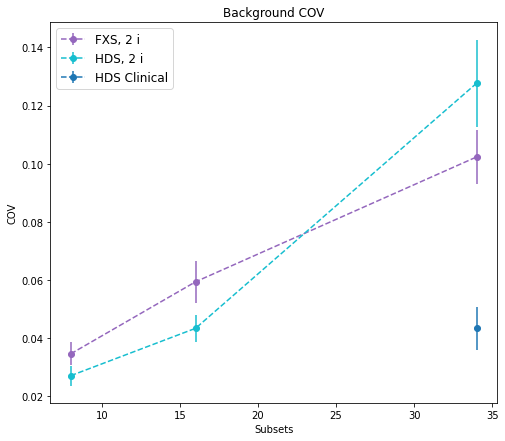

In [93]:
FXS_cov = [FXS_2i_8s.COV,FXS_2i_16s.COV,FXS_2i_34s.COV]
FXS_cov_error = [FXS_2i_8s.COV_error,FXS_2i_16s.COV_error,FXS_2i_34s.COV_error]
HDS_cov = [HDS_2i_8s.COV,HDS_2i_16s.COV,HDS_2i_34s.COV]
HDS_cov_error = [HDS_2i_8s.COV_error,HDS_2i_16s.COV_error,HDS_2i_34s.COV_error]
subs = [8,16,34]
plt.figure(figsize=(8,7))
plt.errorbar(subs,FXS_cov,yerr=FXS_cov_error, marker='o', linestyle = '--',color='C4',label='FXS, 2 i')
plt.errorbar(subs,HDS_cov,yerr=HDS_cov_error, marker='o', linestyle = '--',color='C9',label='HDS, 2 i')
plt.errorbar(34,HDS_clinical.COV,yerr=HDS_clinical.COV_error, marker='o', linestyle = '--',color='C10',label='HDS Clinical')

plt.ylabel('COV')
plt.xlabel('Subsets')
plt.legend(fontsize = 12,loc='upper left')
plt.title('Background COV')
plt.show()

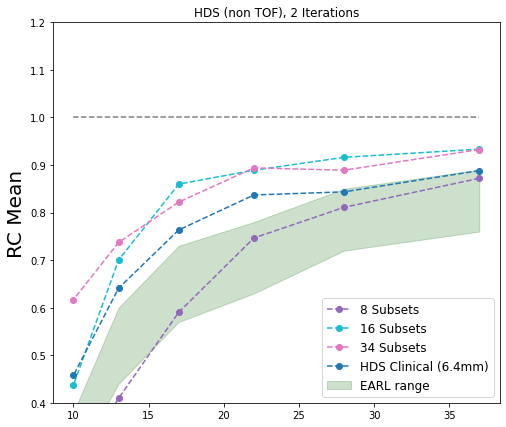

In [91]:
# EARL ranges
RC_max_lims = np.array([[0.95,1.16],[0.91,1.13],[0.83,1.09],
                                [0.73,1.01],[0.59,0.85],[0.31,0.49]])
RC_mean_lims = np.array([[0.76,0.89],[0.72,0.85],[0.63,0.78],
                                [0.57,0.73],[0.44,0.60],[0.27,0.38]])

x = [10,37]
y = [1,1]

# Plots
spheres = np.array([37, 28, 22, 17, 13, 10])
plt.figure(figsize=(8,7))
plt.plot(spheres,HDS_2i_8s.spheres['RC_mean'],marker='o', linestyle = '--',color='C4',label='8 Subsets')
plt.plot(spheres,HDS_2i_16s.spheres['RC_mean'],marker = 'o',linestyle = '--',color='C9',label = '16 Subsets')
plt.plot(spheres,HDS_2i_34s.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C6',label='34 Subsets')
plt.plot(spheres,HDS_clinical.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C10',label='HDS Clinical (6.4mm)')

#plt.plot(spheres,QFX350.spheres['RC_mean'],marker = 'p',linestyle = 'dotted')
plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL range')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
plt.title('HDS (non TOF), 2 Iterations')
plt.show()

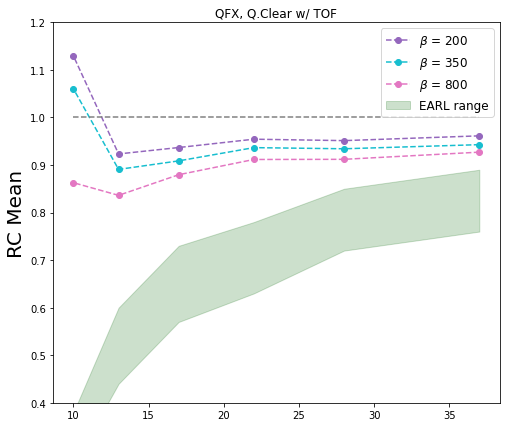

In [73]:
# EARL ranges
RC_max_lims = np.array([[0.95,1.16],[0.91,1.13],[0.83,1.09],
                                [0.73,1.01],[0.59,0.85],[0.31,0.49]])
RC_mean_lims = np.array([[0.76,0.89],[0.72,0.85],[0.63,0.78],
                                [0.57,0.73],[0.44,0.60],[0.27,0.38]])

x = [10,37]
y = [1,1]

# Plots
spheres = np.array([37, 28, 22, 17, 13, 10])
plt.figure(figsize=(8,7))
plt.plot(spheres,QFX_200.spheres['RC_mean'],marker='o', linestyle = '--',color='C4',label=r'$\beta$ = 200')
plt.plot(spheres,QFX_350.spheres['RC_mean'],marker = 'o',linestyle = '--',color='C9',label = r'$\beta$ = 350')
plt.plot(spheres,QFX_800.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C6',label=r'$\beta$ = 800')

#plt.plot(spheres,QFX350.spheres['RC_mean'],marker = 'p',linestyle = 'dotted')
plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL range')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
plt.title('QFX, Q.Clear w/ TOF')
plt.show()

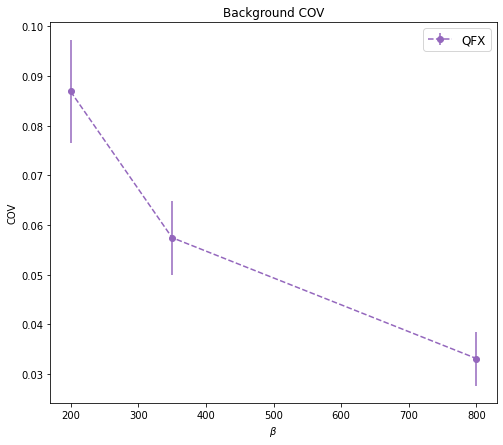

In [88]:

QFX_cov = [QFX_200.COV,QFX_350.COV,QFX_800.COV]
QFX_cov_error = [QFX_200.COV_error,QFX_350.COV_error,QFX_800.COV_error]
beta = [200,350,800]
plt.figure(figsize=(8,7))
plt.errorbar(beta,QFX_cov,yerr=QFX_cov_error, marker='o', linestyle = '--',color='C4',label='QFX')
plt.ylabel('COV')
plt.xlabel(r'$\beta$')
plt.legend(fontsize = 12,loc='upper right')
plt.title('Background COV')
plt.show()

In [94]:
#Guassian smoothing
FXS_2i_16s_3 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_3',sphere_true,bkg_true,0)
FXS_2i_16s_4 = NemaRC('/Users/alexanderhart/t0/10m/FXS_2i_16s_4',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s_3
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/t0/10m/FXS_2i_16s_4
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.


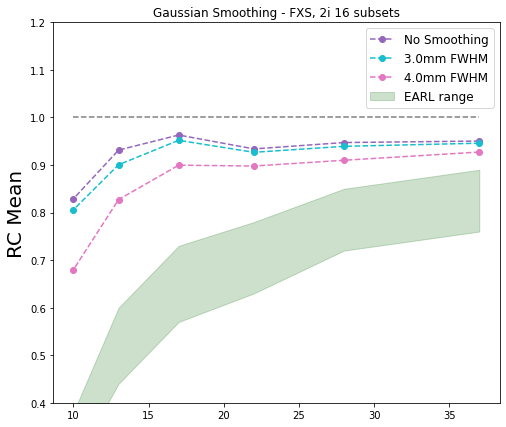

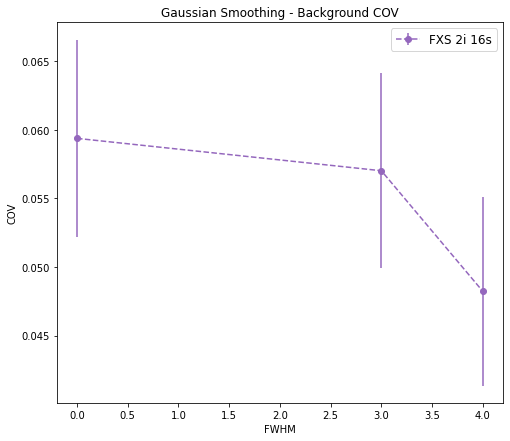

In [96]:
# Gaussian Smoothing, 2i 16 subsets
plt.figure(figsize=(8,7))
plt.plot(spheres,FXS_2i_16s.spheres['RC_mean'],marker='o', linestyle = '--',color='C4',label='No Smoothing')
plt.plot(spheres,FXS_2i_16s_3.spheres['RC_mean'],marker = 'o',linestyle = '--',color='C9',label = '3.0mm FWHM')
plt.plot(spheres,FXS_2i_16s_4.spheres['RC_mean'],marker = 'o', linestyle = '--',color='C6',label='4.0mm FWHM')

plt.fill_between(spheres, RC_mean_lims[:,0], RC_mean_lims[:,1],
                         color='darkgreen', alpha=0.2, label='EARL range')
#plt.xlabel('Sphere Diameter (mm)',fontsize = 18)
plt.plot(x,y,linestyle='--',color='gray')
plt.ylabel('RC Mean', fontsize = 20)
plt.ylim(0.4,1.2)
plt.legend(fontsize = 12)
plt.title('Gaussian Smoothing - FXS, 2i 16 subsets')
plt.show()

FXS_smooth_cov = [FXS_2i_16s.COV,FXS_2i_16s_3.COV,FXS_2i_16s_4.COV]
FXS_smooth_cov_error = [FXS_2i_16s.COV_error,FXS_2i_16s_3.COV_error,FXS_2i_16s_4.COV_error]
Filter = [0,3,4]
plt.figure(figsize=(8,7))
plt.errorbar(Filter,FXS_smooth_cov,yerr=FXS_smooth_cov_error, marker='o', linestyle = '--',color='C4',label='FXS 2i 16s')
plt.ylabel('COV')
plt.xlabel('FWHM')
plt.legend(fontsize = 12,loc='upper right')
plt.title('Gaussian Smoothing - Background COV')
plt.show()